In [1]:
from sympy import*
from IPython.display import Image, display, HTML
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np  

# 1. Position Kinematics - Panda

First I completed the DH methode with the Khalil convention, I am used to this and it makes more sense for me. I'll be able to check my results as well at the end.

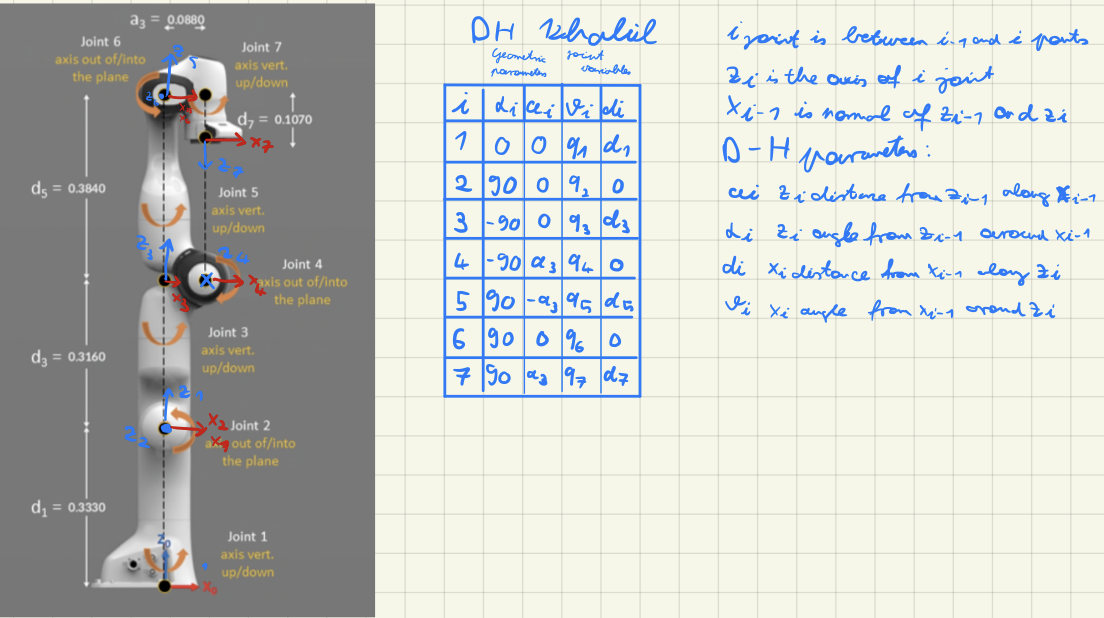

In [2]:
Image("Panda_K.png")

In [3]:
def DH_Tr_sym(alpha=0, a=0, theta=0, d=0):
    Tr_alpha=Matrix([[1,0,0,0],
                       [0,cos(alpha),-sin(alpha),0],
                       [0,sin(alpha) ,cos(alpha),0],
                       [0,0,0,1]])
    Tr_a=Matrix([[1,0,0,a],
                   [0,1,0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    Tr_theta=Matrix([[cos(theta),-sin(theta),0,0],
                       [sin(theta),cos(theta),0,0],
                       [0,0,1,0],
                       [0,0,0,1]])
    Tr_d=Matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,1,d],
                   [0,0,0,1]])
    Tr_KHALIL=Tr_alpha@Tr_a@Tr_theta@Tr_d
    
    return Tr_KHALIL

In [4]:
q1,q2,q3,q4,q5,q6,q7,d1,d3,d5,d7,a3=symbols('q_1 q_2 q_3 q_4 q_5 q_6 q_7 d_1 d_3 d_5 d_7 a_3')

In [5]:
T_01=simplify(DH_Tr_sym(alpha=0, a=0, theta=q1, d=d1))

In [6]:
T_12=simplify(DH_Tr_sym(alpha=pi/2, a=0, theta=q2, d=0))

In [7]:
T_23=simplify(DH_Tr_sym(alpha=-pi/2, a=0, theta=q3, d=d3))

In [8]:
T_34=simplify(DH_Tr_sym(alpha=-pi/2, a=a3, theta=q4, d=0))

In [9]:
T_45=simplify(DH_Tr_sym(alpha=pi/2, a=-a3, theta=q5, d=d5))

In [10]:
T_56=simplify(DH_Tr_sym(alpha=pi/2, a=0, theta=q6, d=0))

In [11]:
T_67=simplify(DH_Tr_sym(alpha=pi/2, a=a3, theta=q7, d=d7))

In [12]:
T_07=T_01@T_12@T_23@T_34@T_45@T_56@T_67
T_07

Matrix([
[((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*cos(q_7) + (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) - (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*sin(q_7), -((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*sin(q_7) + (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) - (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*cos(q_7), (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin

Second I completed the DH methode with the Sponge convention.

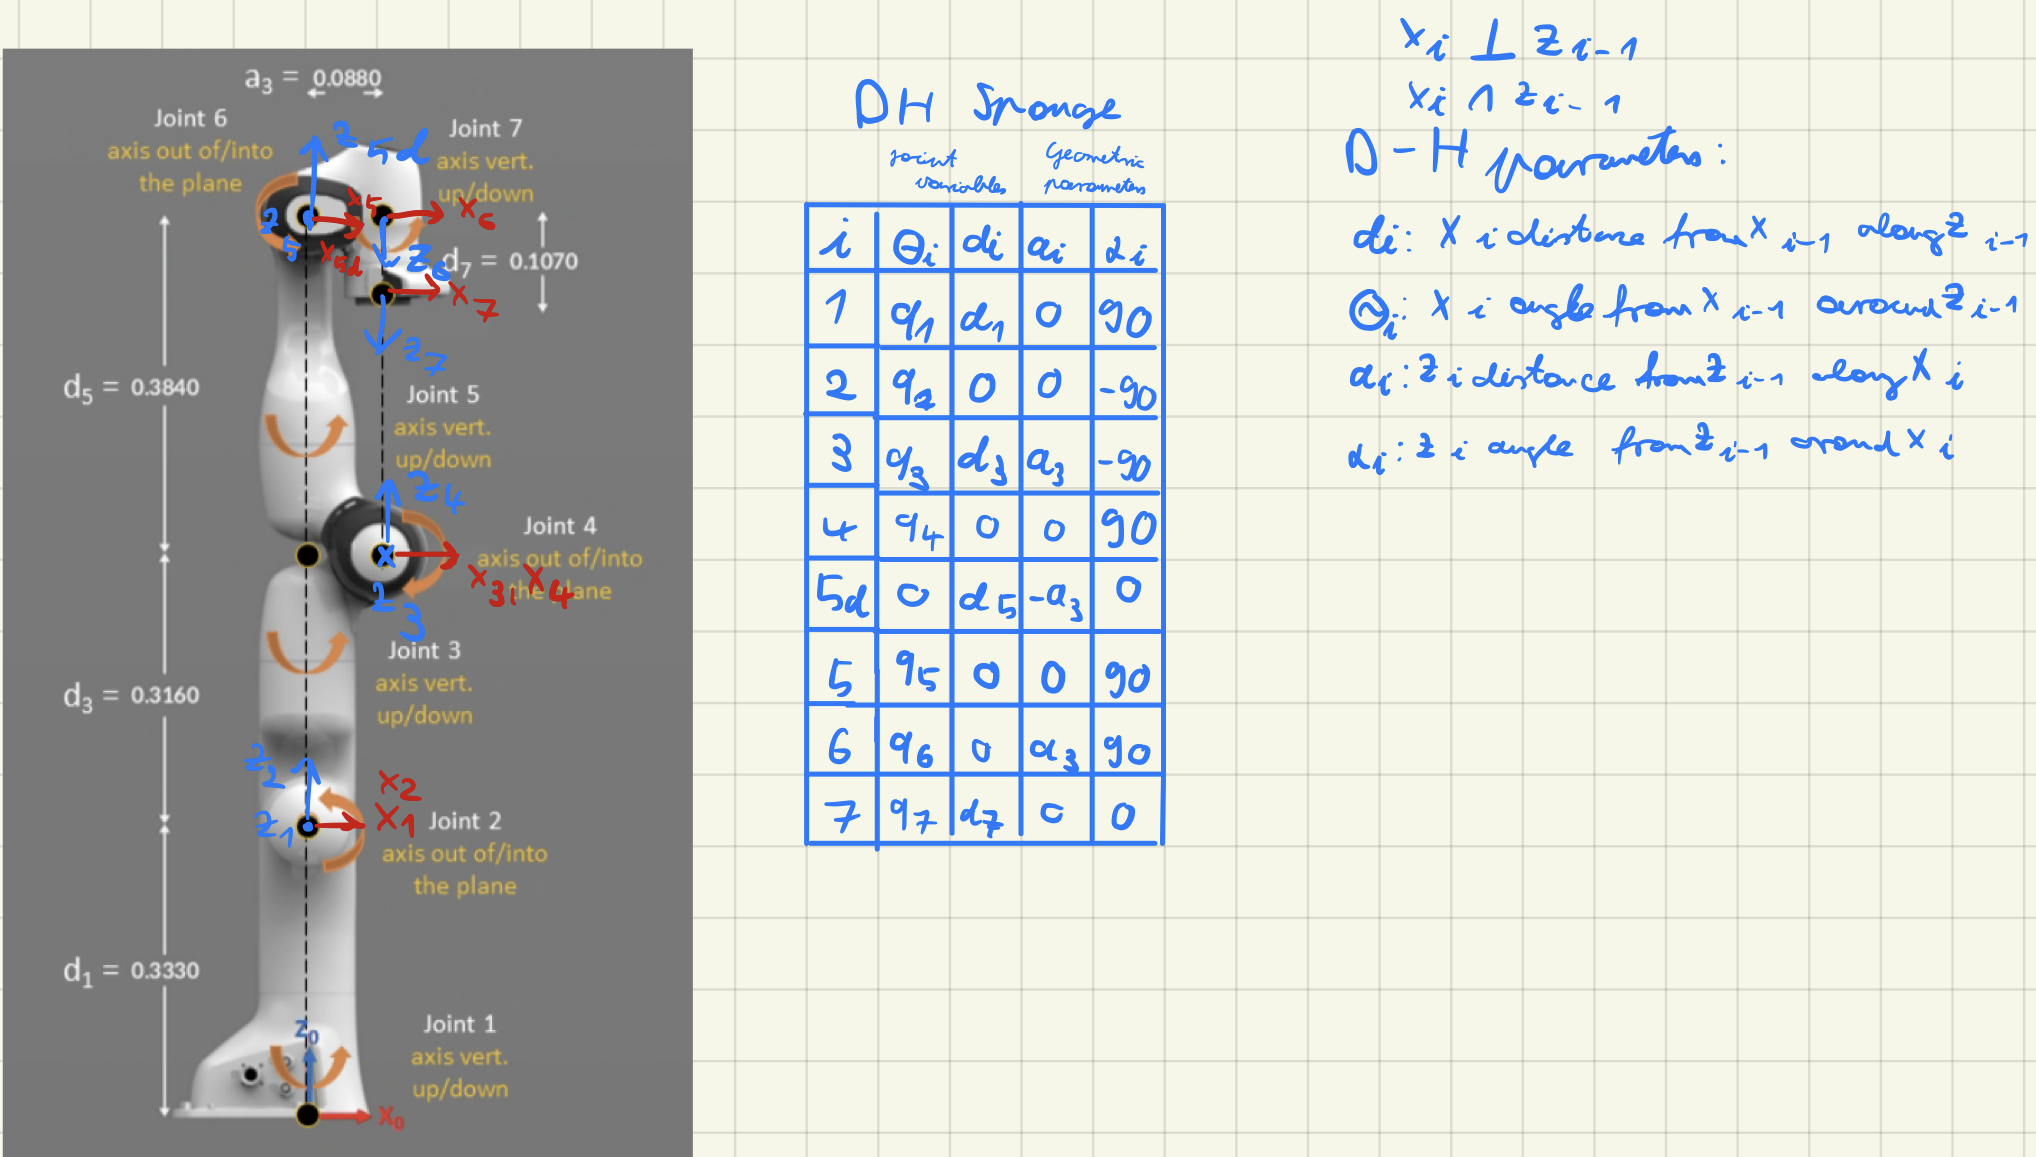

In [13]:
Image("Panda_S.png")

In [14]:
def DH_Tr_sym_UMD(theta=0, d=0 , a=0, alpha=0):
    Tr_theta=Matrix([[cos(theta),-sin(theta),0,0],
                       [sin(theta),cos(theta),0,0],
                       [0,0,1,0],
                       [0,0,0,1]])
    Tr_d=Matrix([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,1,d],
                   [0,0,0,1]])
    Tr_a=Matrix([[1,0,0,a],
                   [0,1,0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    Tr_alpha=Matrix([[1,0,0,0],
                       [0,cos(alpha),-sin(alpha),0],
                       [0,sin(alpha) ,cos(alpha),0],
                       [0,0,0,1]])
    
    
    Tr_KHALIL=Tr_theta@Tr_d@Tr_a@Tr_alpha
    
    return Tr_KHALIL

In [15]:
H_01=DH_Tr_sym_UMD(theta=q1, d=d1 , a=0, alpha=pi/2)
H_01

Matrix([
[cos(q_1), 0,  sin(q_1),   0],
[sin(q_1), 0, -cos(q_1),   0],
[       0, 1,         0, d_1],
[       0, 0,         0,   1]])

In [16]:
H_12=DH_Tr_sym_UMD(theta=q2, d=0 , a=0, alpha=-pi/2)
H_12

Matrix([
[cos(q_2),  0, -sin(q_2), 0],
[sin(q_2),  0,  cos(q_2), 0],
[       0, -1,         0, 0],
[       0,  0,         0, 1]])

In [17]:
H_23=DH_Tr_sym_UMD(theta=q3, d=d3 , a=a3, alpha=-pi/2)
H_23

Matrix([
[cos(q_3),  0, -sin(q_3), a_3*cos(q_3)],
[sin(q_3),  0,  cos(q_3), a_3*sin(q_3)],
[       0, -1,         0,          d_3],
[       0,  0,         0,            1]])

In [18]:
H_34=DH_Tr_sym_UMD(theta=q4, d=0 , a=0, alpha=pi/2)
H_34

Matrix([
[cos(q_4), 0,  sin(q_4), 0],
[sin(q_4), 0, -cos(q_4), 0],
[       0, 1,         0, 0],
[       0, 0,         0, 1]])

In [19]:
H_45d=DH_Tr_sym_UMD(theta=0, d=d5 , a=-a3, alpha=0)
H_45d

Matrix([
[1, 0, 0, -a_3],
[0, 1, 0,    0],
[0, 0, 1,  d_5],
[0, 0, 0,    1]])

In [20]:
H_5d5=DH_Tr_sym_UMD(theta=q5, d=0 , a=0, alpha=pi/2)
H_5d5

Matrix([
[cos(q_5), 0,  sin(q_5), 0],
[sin(q_5), 0, -cos(q_5), 0],
[       0, 1,         0, 0],
[       0, 0,         0, 1]])

In [21]:
H_56=DH_Tr_sym_UMD(theta=q6, d=0 , a=a3, alpha=pi/2)
H_56

Matrix([
[cos(q_6), 0,  sin(q_6), a_3*cos(q_6)],
[sin(q_6), 0, -cos(q_6), a_3*sin(q_6)],
[       0, 1,         0,            0],
[       0, 0,         0,            1]])

In [22]:
H_67=DH_Tr_sym_UMD(theta=q7, d=d7 , a=0, alpha=0)
H_67

Matrix([
[cos(q_7), -sin(q_7), 0,   0],
[sin(q_7),  cos(q_7), 0,   0],
[       0,         0, 1, d_7],
[       0,         0, 0,   1]])

In [23]:
H_07=H_01@H_12@H_23@H_34@H_45d@H_5d5@H_56@H_67
H_07

Matrix([
[((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*cos(q_7) + (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) - (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*sin(q_7), -((((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*cos(q_5) + (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*sin(q_5))*cos(q_6) + ((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*sin(q_4) - sin(q_2)*cos(q_1)*cos(q_4))*sin(q_6))*sin(q_7) + (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin(q_4)*cos(q_1))*sin(q_5) - (-sin(q_1)*cos(q_3) - sin(q_3)*cos(q_1)*cos(q_2))*cos(q_5))*cos(q_7), (((-sin(q_1)*sin(q_3) + cos(q_1)*cos(q_2)*cos(q_3))*cos(q_4) + sin(q_2)*sin

I compared the two results, they are giving the same answers, so it seems fine

In [24]:
T_07.subs({q1:pi,q2:pi/2,q3:pi,q4:pi/2,q5:pi,q6:pi/2,q7:pi})

Matrix([
[0,  0, 1,    a_3 + d_3 + d_7],
[0, -1, 0,                  0],
[1,  0, 0, -2*a_3 + d_1 - d_5],
[0,  0, 0,                  1]])

In [25]:
H_07.subs({q1:pi,q2:pi/2,q3:pi,q4:pi/2,q5:pi,q6:pi/2,q7:pi})

Matrix([
[0,  0, 1,    a_3 + d_3 + d_7],
[0, -1, 0,                  0],
[1,  0, 0, -2*a_3 + d_1 - d_5],
[0,  0, 0,                  1]])

In tha last step I completed the five known configuration.

Testing with known configutation.
Let $d_1,d_3,d_5=1$ and $d_7,a_3=0.5$

First test the configuration according to the initial pose, means, all angles are 0.
Output should be at $x=0.5,y=0,z=2.5$ with orientation $x=x,y=-y,z=-z$

In [26]:
H_07.subs({q1:0,q2:0,q3:0,q4:0,q5:0,q6:0,q7:0,d1:1,d3:1,d5:1,d7:0.5,a3:0.5})

Matrix([
[1,  0,  0, 0.5],
[0, -1,  0,   0],
[0,  0, -1, 2.5],
[0,  0,  0,   1]])

Second test the configuration with $q_7=90 deg$
Output should be at $x=0.5,y=0,z=2.5$ with orientation $x=-y,y=-x,z=-z$

In [27]:
H_07.subs({q1:0,q2:0,q3:0,q4:0,q5:0,q6:0,q7:pi/2,d1:1,d3:1,d5:1,d7:0.5,a3:0.5})

Matrix([
[ 0, -1,  0, 0.5],
[-1,  0,  0,   0],
[ 0,  0, -1, 2.5],
[ 0,  0,  0,   1]])

Third test the configuration with $q_5=-90 deg$ and $q_7=-90 deg$
Output should be at $x=0,y=-0.5,z=2.5$ with orientation $x=x,y=-y,z=-z$

In [28]:
H_07.subs({q1:0,q2:0,q3:0,q4:0,q5:-pi/2,q6:0,q7:-pi/2,d1:1,d3:1,d5:1,d7:0.5,a3:0.5})

Matrix([
[1,  0,  0,    0],
[0, -1,  0, -0.5],
[0,  0, -1,  2.5],
[0,  0,  0,    1]])

Fourth test the configuration with $q_1=-90 deg$ and $q_3=-90 deg$ and $q4=90deg$
Output should be at $x=1,y=0,z=2$ with orientation $x=-z,y=-y,z=-x$

In [29]:
H_07.subs({q1:pi/2,q2:0,q3:-pi/2,q4:pi/2,q5:0,q6:0,q7:0,d1:1,d3:1,d5:1,d7:0.5,a3:0.5})

Matrix([
[ 0,  0, -1, 1.0],
[ 0, -1,  0,   0],
[-1,  0,  0, 2.0],
[ 0,  0,  0,   1]])

Fifth test the configuration with $q_2=-90 deg$ and $q_6=270deg$
Output should be at $x=1.5,y=0,z=1.5$ with orientation $x=-x,y=-y,z=z$

In [30]:
H_07.subs({q1:0,q2:-pi/2,q3:0,q4:0,q5:0,q6:1.5*pi,q7:0,d1:1,d3:1,d5:1,d7:0.5,a3:0.5})

Matrix([
[-1,  0, 0, 1.5],
[ 0, -1, 0,   0],
[ 0,  0, 1, 1.5],
[ 0,  0, 0,   1]])

# 2. Position Kinematics - KUKA

See the table and the drawing below.

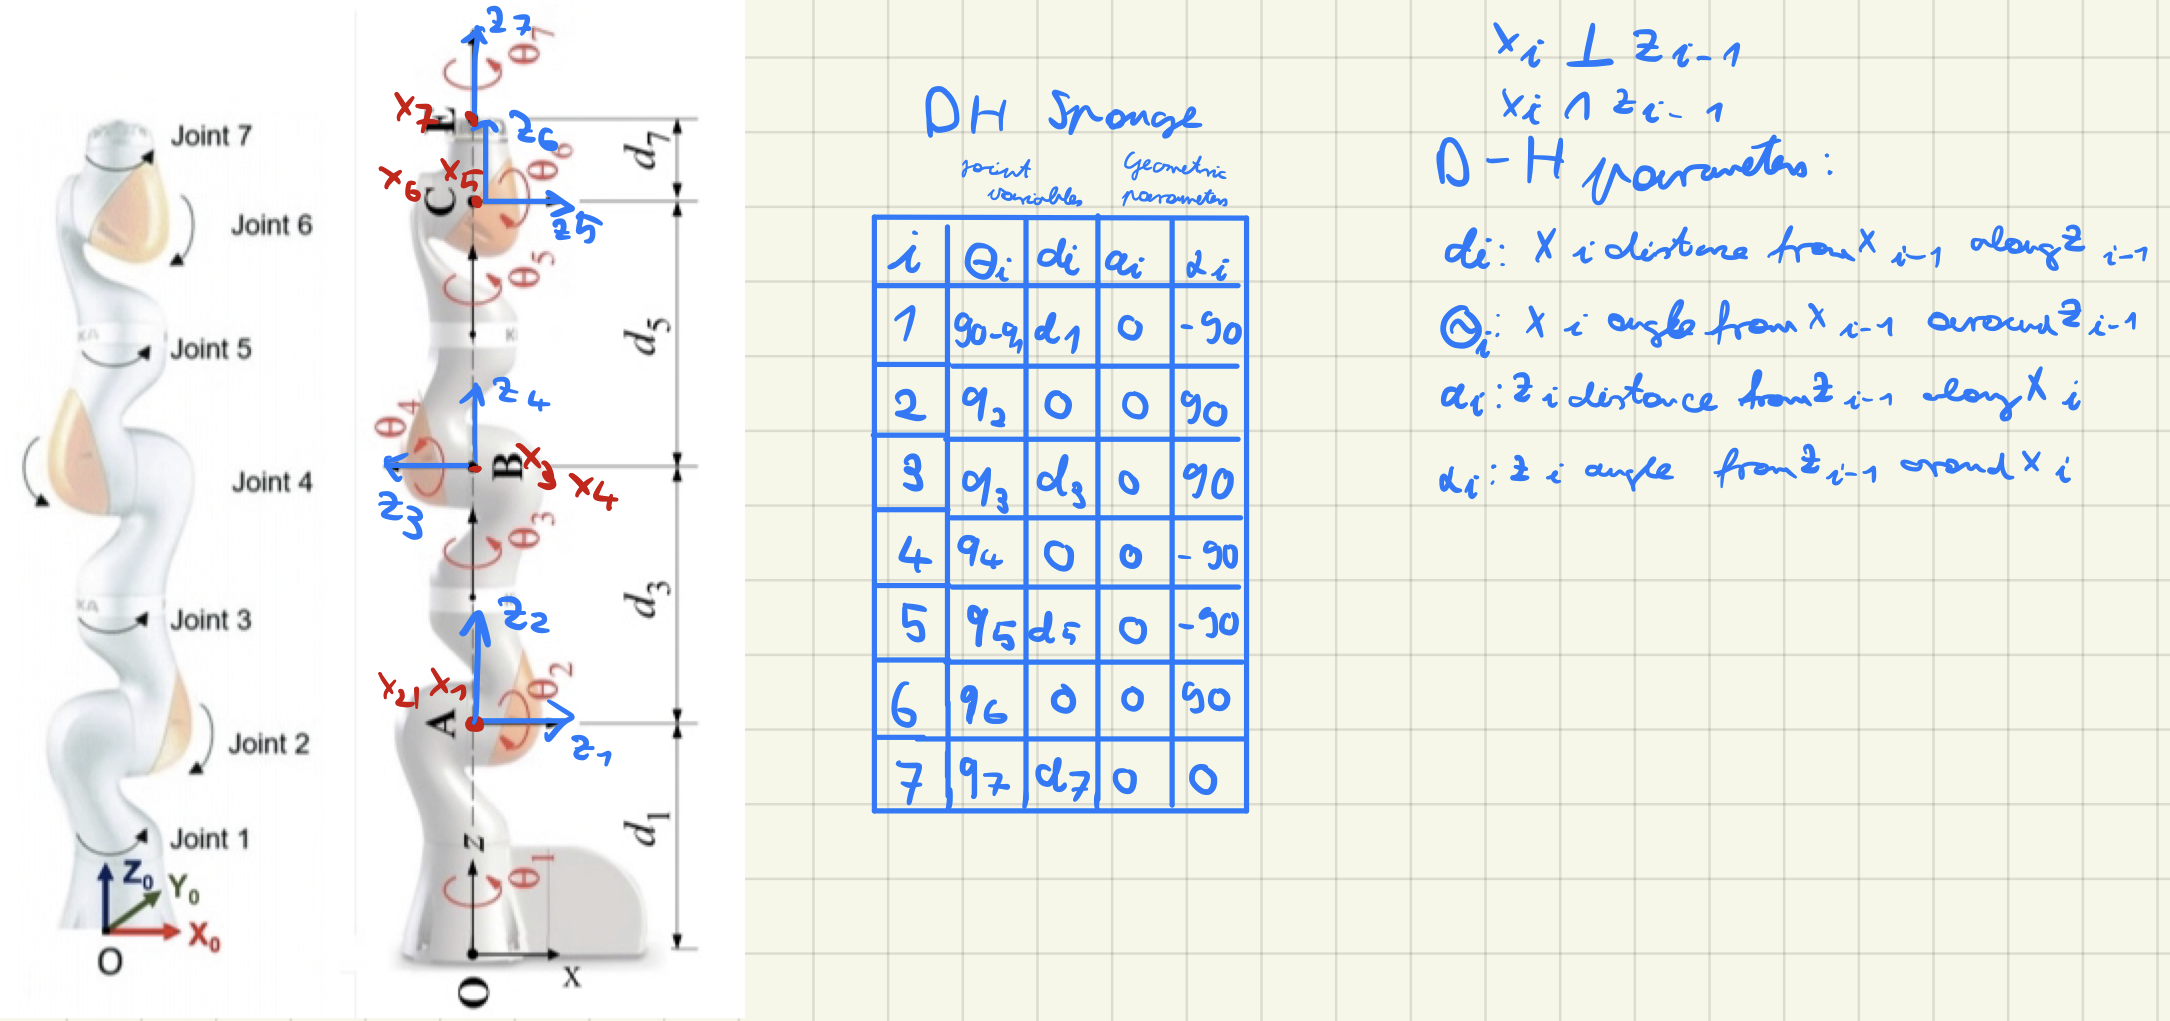

In [31]:
Image("KUKA.png")